<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/ModeloRBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Este programa tem como objetivo estimar do número de PageViews nos dias 12 e 13 de Setembro, para isso utilizei modelos de suavização exponencial sendo eles: Algoritmo de suavização Simples,Holt-Winters (aditivo e multiplicativo) e Pegels (aditivo e multiplicativo).**
 **Os texto em itálico PageViews utilizado para a construção dos modelos foram retirados da fonte de dados "Analytics_GZH_GA4_PRD" e o período utilizado foi 16/07/2023 até 06/09/2023**

**IMPORTANDO BIBLIOTECAS**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

from sklearn.metrics import mean_absolute_error,mean_squared_error



**IMPORTANDO OS DADOS**

In [5]:
dados = pd.read_csv('/content/drive/MyDrive/Python/tabelas/Dados.xlsx - Planilha1 (2).csv',encoding='iso-8859-1',header=None,names=["Data","PageViews"])

**BREVE ANÁLISE DOS DADOS**

In [6]:
dados.head(10)

,Data,PageViews
0,1\01\2023,824605
1,2\01\2023,1064369
2,3\01\2023,1173812
3,4\01\2023,1243996
4,5\01\2023,1039252
5,6\01\2023,1093870
6,7\01\2023,853372
7,8\01\2023,795653
8,9\01\2023,978525
9,10\01\2023,954873


**GERANDO UMA COLUNA DE DATAS**

In [7]:

data_inicial = '01-01-2023'
data_final = '06-09-2023'
datas = []

# Loop para gerar as datas de dia em dia
data_atual = pd.to_datetime(data_inicial, format='%d-%m-%Y')
data_fim = pd.to_datetime(data_final, format='%d-%m-%Y')

while data_atual <= data_fim:
    datas.append(data_atual)
    data_atual += pd.DateOffset(days=1)

# DataFrame com as datas
df1 = pd.DataFrame({'data': datas})

# DataFrame resultante
print(df1)


          data
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
..         ...
244 2023-09-02
245 2023-09-03
246 2023-09-04
247 2023-09-05
248 2023-09-06

[249 rows x 1 columns]


**EXCLUINDO A COLUNA Data POR NÃO ESTAR NO FORMATO DESEJADO**

In [8]:
del dados["Data"]

**JUNTANDO O DATA FRAME COM AS DATAS CRIADAS E AS PAGEVIEWS**

In [9]:
df = pd.concat([df1,dados], axis=1)


**TRANSFORMANDO A COLUNA "data" PARA O FORMATO DE DATA**

In [10]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')


**ESCOLHENDO OS PAGEVIEWS APENAS DO GA4**

In [11]:
ga4 = df[196:len(df)]

<Axes: >

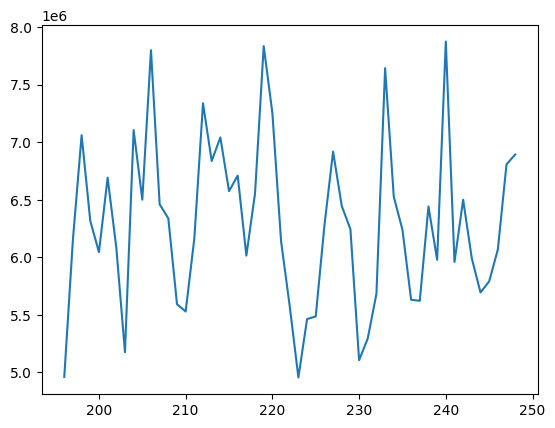

In [14]:
ga4.PageViews.plot()


In [15]:
ga4.index = pd.to_datetime(ga4['data'], format='%d/%m/%Y')

Modelo de Suavização Simples


In [ ]:
modelo = SimpleExpSmoothing(ga4.PageViews).fit()
previsao = modelo.predict(start='2023-9-7',end='2023-9-15')

Modelo de Suavização de Holt-Winters aditivo

In [ ]:

modelo_2=ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='add').fit()
#Gerandio as previsões
previsao_2 = modelo_2.predict(start='2023-9-7',end='2023-9-15')


Modelo de Suavização de Holt-Winters multiplicativo

In [ ]:

modelo_3 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='add').fit()
previsao_3 = modelo_3.predict(start='2023-9-7',end='2023-9-15')



Modelo de Suavização Pegels aditivo

In [ ]:
modelo_4 = ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='mul').fit()
previsao_4 = modelo_4.predict(start='2023-9-7',end='2023-9-15')

Modelo de Suavização Pegels multiplicativo

In [ ]:
modelo_5 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='mul').fit()
previsao_5 = modelo_5.predict(start='2023-9-7',end='2023-9-15')

In [25]:
print('*************Métricas do Algoritmo de Suavização Simples*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Simples :',
      round(mean_absolute_error(ga4.PageViews,modelo.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Simples :',
      round(mean_squared_error(ga4.PageViews,modelo.fittedvalues)**0.5,3))


print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Holt-Winters aditivo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_2.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_2.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Holt-Winters multiplicativo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_absolute_error(ga4.PageViews,modelo_3.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_squared_error(ga4.PageViews,modelo_3.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Pegels aditivo *************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_4.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_4.fittedvalues)**0.5,3))

print(' '*504)
print('*************Métricas do Algoritmo de Suavização de Pegels multiplicativo*************')
print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_absolute_error(ga4.PageViews,modelo_5.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_squared_error(ga4.PageViews,modelo_5.fittedvalues)**0.5,3))

*************Métricas do Algoritmo de Suavização Simples*************
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Simples : 619706.974
-Raiz do erro médio quadrado do Algoritmo de Suavização Simples : 799041.127
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
*************Métricas do

**Vemos que o modelo 2 foi aquele que se saiu melhor por possuir os menores erros, dessa forma iremos usá-lo para fazer as predições**

**AJUSTE DO MODELO**

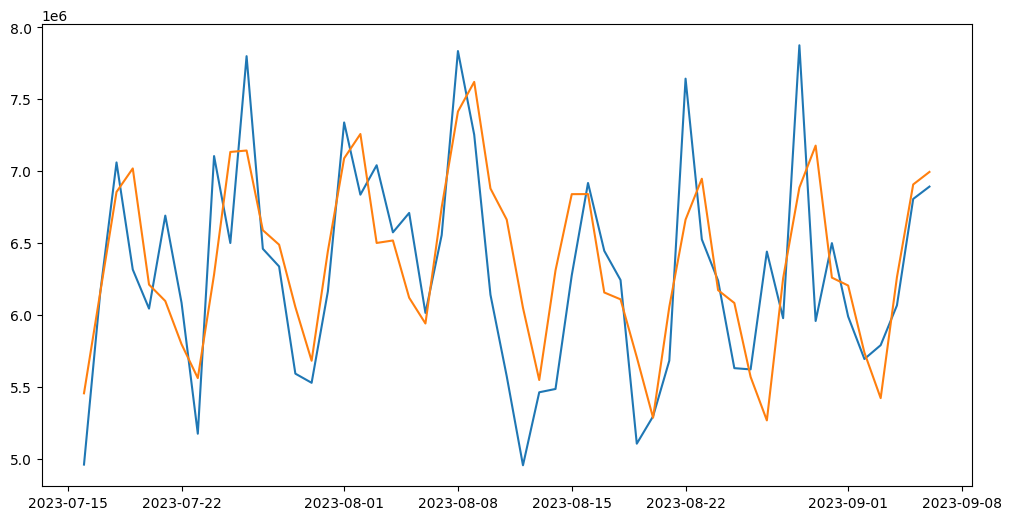

In [28]:
plt.figure(figsize=(12,6))
plt.plot(ga4.PageViews)
plt.plot(modelo_2.fittedvalues)

**ANÁLISE DOS RESÍDUOS**

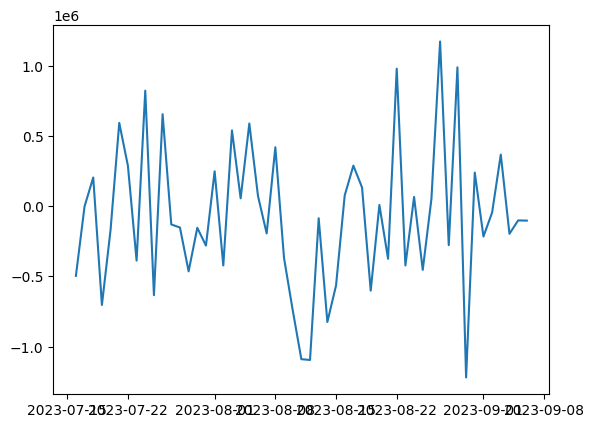

In [29]:
residuo = modelo_2.resid
plt.plot(residuo)

In [ ]:
from scipy.stats import jarque_bera
print(' '*254)
test1 = jarque_bera(residuo)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1]) # São Normais

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.3098498467234309
P-valor : 0.8564794766697681


**PREVISÃO DOS DIAS 7 A 15**

2023-09-07    6.278415e+06
2023-09-08    6.178274e+06
2023-09-09    5.750728e+06
2023-09-10    5.442214e+06
2023-09-11    6.213588e+06
2023-09-12    6.893053e+06
2023-09-13    6.997983e+06
2023-09-14    6.301527e+06
2023-09-15    6.201386e+06
Freq: D, dtype: float64

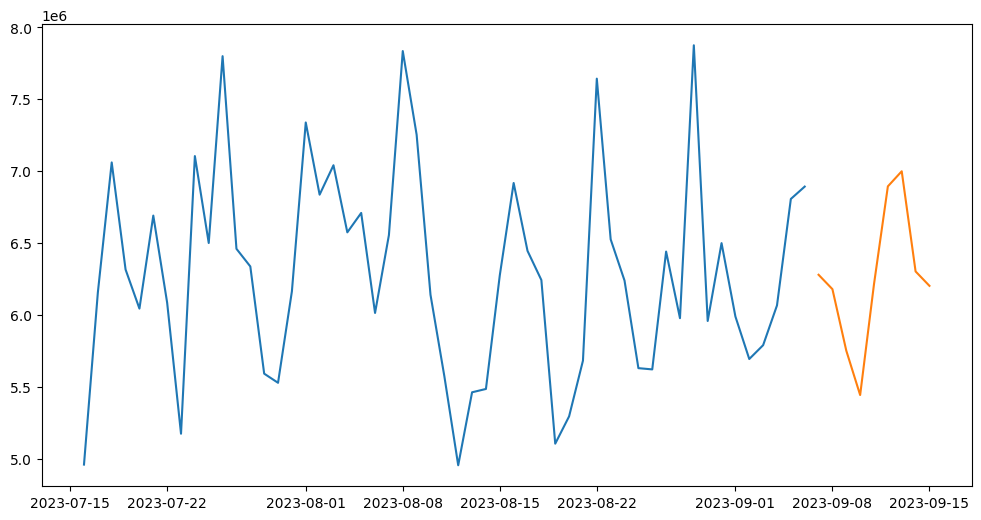

In [30]:
plt.figure(figsize=(12,6))
plt.plot(ga4.PageViews)
plt.plot(previsao_2)
previsao_2